<a href="https://colab.research.google.com/github/mthonorio/IA/blob/main/prova_2/ProvaIA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2ª Prova de IA
### Aluno: Matheus Batista Honório
### Matrícula: 20190097098

Instalando as bibliotecas necessárias para o AUTOML e SCIPY

In [ ]:
!pip3 install auto-sklearn 
!pip3 install scipy -U

Após este passo, é necessário fazer o restart da máquina do colab e pode executar todas as células com o funcionamento normal do sistema.

### 1º Questão: 
Utilizando a base de dados de https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation, elabore uma solução para identificar o OUTPUT Grade do estudante. Lembre-se de comentar seu código no notebook detalhadamente, explicando cada passo.

A) Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo.
OBS: Utilize pelo menos uma forma de redimensionamento de atributos (selecionando ou agregando) e avalie o resultado de utilizar todas eles e essa amostra.

B) Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho.

C) Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros.

D) Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso, escolha 2 métricas de sua preferência e o que o seu resultado significa.

In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import precision_score, silhouette_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Importando o dataframe e printando os 5 primeiros valores
df = pd.read_csv("student_prediction.csv")
df.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
# Analisando as informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

In [4]:
# Removendo a coluna studentID do dataframe
df = df.drop(columns=['STUDENTID'])
df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,1,2,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,3,2,3,2,2,3,1,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,2,2,1,1,2,2,1,1
3,1,1,1,3,1,2,1,2,1,2,...,1,2,3,2,2,1,3,2,1,1
4,2,2,1,3,2,2,1,3,1,4,...,2,1,2,2,2,1,2,2,1,1


In [5]:
# Removendo dados duplicados
df = df.drop_duplicates()

# Removendo valores vazios
df = df.dropna(how = 'any')

In [6]:
df.describe().T.style.background_gradient(cmap = "Blues")

,count,mean,std,min,25%,50%,75%,max
AGE,145.000000,1.620690,0.613154,1.000000,1.000000,2.000000,2.000000,3.000000
GENDER,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
HS_TYPE,145.000000,1.944828,0.537216,1.000000,2.000000,2.000000,2.000000,3.000000
SCHOLARSHIP,145.000000,3.572414,0.805750,1.000000,3.000000,3.000000,4.000000,5.000000
WORK,145.000000,1.662069,0.474644,1.000000,1.000000,2.000000,2.000000,2.000000
ACTIVITY,145.000000,1.600000,0.491596,1.000000,1.000000,2.000000,2.000000,2.000000
PARTNER,145.000000,1.579310,0.495381,1.000000,1.000000,2.000000,2.000000,2.000000
SALARY,145.000000,1.627586,1.020245,1.000000,1.000000,1.000000,2.000000,5.000000
TRANSPORT,145.000000,1.620690,1.061112,1.000000,1.000000,1.000000,2.000000,4.000000
LIVING,145.000000,1.731034,0.783999,1.000000,1.000000,2.000000,2.000000,4.000000


In [7]:
# Analisando a correlação entre todos os atributos
correlacao = df.corr()
correlacao.style.background_gradient(cmap = 'Blues')

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,0.127853,0.001472,-0.199257,-0.068972,-0.070108,0.069748,0.172668,-0.200812,-0.141571,-0.172833,0.059712,0.078849,-0.226882,0.007306,0.060027,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.304994,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.022154,-0.013313,-0.154957,0.062370,0.120638,0.060216,-0.028781,-0.056143,-0.033997,-0.067750,0.045206,-0.005233,-0.363971,-0.144138,-0.065795,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,-0.430704,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.126440,0.023944,-0.018990,-0.166336,-0.134322,0.051827,0.009990,-0.050269,-0.131680,-0.174719,-0.010144,0.050529,-0.009101,0.124317,-0.032180,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,-0.118761,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,-0.119024,0.028288,0.036543,-0.109006,-0.222776,-0.037831,-0.005450,0.023919,-0.012785,0.003758,0.008877,0.061543,0.214838,0.041443,-0.141190,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.317563,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.118284,0.102223,-0.152641,0.153780,0.205138,-0.134003,-0.165492,-0.044113,0.005919,-0.114824,-0.096332,-0.171384,-0.018640,-0.120973,0.028198,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,-0.114794,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,0.060922,0.026626,-0.227030,-0.122430,-0.113252,0.143273,-0.057563,-0.161412,0.019123,-0.129342,-0.281283,-0.214557,-0.020602,-0.024023,0.098693,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.326711,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.078556,0.037811,-0.168201,-0.043001,0.045241,0.033182,-0.128034,-0.211091,-0.176901,0.048897,0.090581,-0.004119,0.103634,0.038636,0.154225,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,0.068769,-0.051778
SALARY,0.127853,-0.022154,-0.126440,-0.119024,-0.118284,0.060922,-0.078556,1.000000,-0.015926,0.030177,0.123932,0.031212,0.007866,0.101380,0.028451,-0.109689,-0.097935,-0.072357,0.009390,-0.106800,0.059872,0.111506,0.213079,0.048955,-0.235900,-0.050648,-0.031225,-0.037184,-0.100950,-0.058644,-0.123024,-0.166352
TRANSPORT,0.001472,-0.013313,0.023944,0.028288,0.102223,0.026626,0.037811,-0.015926,1.000000,0.327283,0.168831,0.090659,-0.253099,-0.033565,0.274118,-0.116259,0.007134,-0.046942,-0.124146,0.059791,0.070998,-0.056759,-0.015048,-0.094471,0.022769,-0.019064,-0.134057,-0.158432,-0.036078,0.005909,0.114839,-0.156289
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,0.030177,0.327283,1.000000,0.159529,0.206439,-0.276875,-0.059119,0.384892,0.016447,-0.021241,-0.081128,-0.155241,0.179520,0.001039,-0.135860,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.271997,0.023683


In [8]:
# Removendo as colunas com base na correlação a GRADE(Notas)
df = df.drop(columns=['SALARY', 'TRANSPORT', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'COURSE ID', 'KIDS', '#_SIBLINGS', 'MOTHER_EDU', 'MOTHER_JOB', 'FATHER_EDU', 'FATHER_JOB'])
df.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,LIVING,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
0,2,2,3,3,1,2,2,1,3,2,2,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,2,2,2,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,2,1,2,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,3,1,2,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,4,2,1,1,2,1,2,2,2,1,2,2,1


As colunas acima foram retiradas devido a sua baixa correlação com as notas dos estudantes, em ressalve as colunas referentes ao ambiente familiar do estudante, pois como premissa assumi que caso o estudante seja bolsista pertence a uma classe menos afortunada, logo não se faz necessário o treinamento conter análise de dados familiares.

In [9]:
# Verificando a correlação entre todos os atributos novamente
correlacao = df.corr()
correlacao.style.background_gradient(cmap = 'Blues')

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,LIVING,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
AGE,1.000000,0.138233,0.294426,-0.316506,-0.181019,0.138233,0.042572,-0.199257,-0.172833,0.059712,0.078849,-0.044462,0.030595,-0.181121,0.235576,-0.100812,0.228884,0.172597,0.121441,-0.095251
GENDER,0.138233,1.000000,0.126218,-0.206876,0.190476,0.224138,-0.125471,-0.154957,-0.067750,0.045206,-0.005233,-0.032164,-0.013833,0.065013,-0.184238,0.065449,0.223095,0.241033,0.292842,0.335533
HS_TYPE,0.294426,0.126218,1.000000,-0.086965,-0.155331,0.073627,0.016557,-0.018990,-0.174719,-0.010144,0.050529,-0.027258,-0.053034,0.053969,0.123405,-0.082461,0.055107,0.019802,0.053497,0.104821
SCHOLARSHIP,-0.316506,-0.206876,-0.086965,1.000000,0.055351,-0.154281,0.120346,0.036543,0.003758,0.008877,0.061543,0.027357,0.005529,0.164447,0.018147,0.147922,-0.095411,0.236460,0.243517,0.023963
WORK,-0.181019,0.190476,-0.155331,0.055351,1.000000,0.220238,0.100010,-0.152641,-0.114824,-0.096332,-0.171384,-0.153273,-0.246770,-0.033757,-0.158217,0.078973,0.027762,0.034666,0.007706,0.167445
ACTIVITY,0.138233,0.224138,0.073627,-0.154281,0.220238,1.000000,-0.011406,-0.227030,-0.129342,-0.281283,-0.214557,-0.124062,-0.117580,-0.035007,0.004187,-0.028050,0.135949,0.002171,-0.092476,-0.062993
PARTNER,0.042572,-0.125471,0.016557,0.120346,0.100010,-0.011406,1.000000,-0.168201,0.048897,0.090581,-0.004119,-0.191197,-0.031005,0.005818,-0.054734,-0.000480,-0.082664,-0.058479,-0.012658,-0.051778
LIVING,-0.199257,-0.154957,-0.018990,0.036543,-0.152641,-0.227030,-0.168201,1.000000,-0.021241,-0.081128,-0.155241,0.132236,0.009870,0.066609,0.146396,-0.024462,-0.136949,-0.082775,-0.007332,0.023683
STUDY_HRS,-0.172833,-0.067750,-0.174719,0.003758,-0.114824,-0.129342,0.048897,-0.021241,1.000000,0.250309,0.204701,-0.145267,0.281668,0.163465,-0.107697,0.020040,0.014943,0.008145,0.066071,-0.033065
READ_FREQ,0.059712,0.045206,-0.010144,0.008877,-0.096332,-0.281283,0.090581,-0.081128,0.250309,1.000000,0.368415,-0.046113,0.040021,0.029691,-0.101711,0.064246,0.189729,-0.075979,0.064566,0.195617


Text(0, 0.5, 'Values')

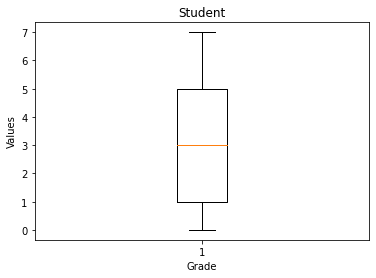

In [10]:
# Análise exploratória dos dados de saída utilizando boxplot
plt.boxplot(df['GRADE'])

plt.title('Student')
plt.xlabel('Grade')
plt.ylabel('Values')

In [11]:
# Análisando a média de notas
mean = df['GRADE'].mean()
print('Média de notas: ' + str(mean))


# Análisando a variância
var = df['GRADE'].var()
print('Variância: ' + str(var))

# Desvio padrão das notas
std = df['GRADE'].std()
print('Desvio Padrão: ' + str(std))

Média de notas: 3.2275862068965515
Variância: 4.829789272030651
Desvio Padrão: 2.1976781547876048


In [12]:
# Analisando o desbalanceamento entre as notas
df['GRADE'].value_counts()

1    35
2    24
3    21
5    17
7    17
6    13
4    10
0     8
Name: GRADE, dtype: int64

Para redimensionar os atributos, utilizei o Oversampling

In [13]:
# Dividindo o dataframe em uma proporção 8 por 2
X = df.drop('GRADE', axis = 1)
y = df['GRADE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
# Utilizando o método random para o oversampling
oversampler = RandomOverSampler(random_state = 1)

X_smote, y_smote = oversampler.fit_resample(X_train, y_train)

print('Dados redimencionados pelo oversampling:')
y_smote.value_counts()

Dados redimencionados pelo oversampling:


3    24
7    24
6    24
2    24
4    24
5    24
1    24
0    24
Name: GRADE, dtype: int64

In [19]:
# Mesclando o X_smote (dataframe sem o atributo notas) com o y_smote (dataframe com as notas) para formar um novo dataframe
merge = y_smote.to_frame() # Converte do tipo series para dataframe

df_treated = X_smote.join(merge['GRADE'])
df_treated.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,LIVING,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
0,1,2,2,3,2,2,1,1,3,2,2,1,1,2,2,2,1,4,3,3
1,3,2,2,3,2,2,1,2,2,2,2,1,1,3,2,3,3,5,4,3
2,1,2,1,3,2,1,1,2,3,2,2,2,2,3,2,3,1,4,4,7
3,1,2,1,4,2,2,1,2,2,3,2,1,1,2,2,3,2,4,4,7
4,1,2,2,4,1,2,2,3,2,2,2,1,1,3,2,2,1,3,3,6


In [ ]:
# Fragmentando a base após o oversampling

X = df_treated.drop('GRADE', axis = 1)
y = df_treated['GRADE']

# Respeitando a decisão do tamanho do teste passado anteriormente sendo 8 por 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from autosklearn.classification import AutoSklearnClassifier #Lib para utilizar o AutoML

In [ ]:
# Modelo Holdout
# O algoritmo irá executar por 4 minutos, com um tempo máximo de 30 segundos para cada uma das instância, usando todos os processadores disponíveis
# (O algoritmo será executado 8x durante este tempo).
model_holdout = AutoSklearnClassifier(time_left_for_this_task=4*60, per_run_time_limit=30, n_jobs=-1)

# Inicializa a busca do algoritmo
model_holdout.fit(X_train, y_train)

# Plotando as estatísticas do processo
print(model_holdout.sprint_statistics())

# Testando o modelo
y_h = model_holdout.predict(X_test)
acc = accuracy_score(y_test, y_h)
print("Acuracia: %.2f" % acc)

auto-sklearn results:
  Dataset name: 99c66e8a-e361-11ec-80ca-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.666667
  Number of target algorithm runs: 51
  Number of successful target algorithm runs: 49
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 1

Acuracia: 0.59


In [ ]:
# Modelo Holdout Iterative Fit
# O algoritmo irá executar por 4 minutos, com um tempo máximo de 30 segundos para cada uma das instância, com base de treinamento em 8 por 2 nos argumentos e usando todos os processadores disponíveis
# (O algoritmo será executado 8x durante este tempo).
model_holdout_iterative_fit = AutoSklearnClassifier(time_left_for_this_task=4*60, per_run_time_limit=30, n_jobs=-1, resampling_strategy = 'holdout-iterative-fit', resampling_strategy_arguments={'train_size': 0.8})

# Inicializa a busca
model_holdout_iterative_fit.fit(X_train, y_train)

# Mostrando as estatísticas do processo
print(model_holdout_iterative_fit.sprint_statistics())

# Testando o modelo
y_hif = model_holdout_iterative_fit.predict(X_test)
acc = accuracy_score(y_test, y_hif)
print("Acuracia: %.3f" % acc)

auto-sklearn results:
  Dataset name: 294c9b9a-e362-11ec-80ca-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.806452
  Number of target algorithm runs: 60
  Number of successful target algorithm runs: 32
  Number of crashed target algorithm runs: 27
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 1

Acuracia: 0.590


In [ ]:
# Modelo Cross Validation com 10 folds
# O algoritmo irá executar por 4 minutos, com um tempo máximo de 30 segundos para cada uma das instância, com base de treinamento em 8 por 2 nos argumentos e usando todos os processadores disponíveis
# (O algoritmo será executado 8x durante este tempo).
modelo_cross = AutoSklearnClassifier(time_left_for_this_task=4*60, per_run_time_limit=30, n_jobs=-1, resampling_strategy = 'cv', resampling_strategy_arguments={'folds': 10})

# Inicializa a busca
modelo_cross.fit(X_train, y_train)

# Mostrando as estatísticas do processo
print(modelo_cross.sprint_statistics())

# Testando o melhor modelo
y_cv = modelo_cross.predict(X_test)
acc = accuracy_score(y_test, y_cv)
print("Acuracia: %.3f" % acc)

auto-sklearn results:
  Dataset name: b5e86aae-e362-11ec-80ca-0242ac1c0002
  Metric: accuracy
  Best validation score: 0.705882
  Number of target algorithm runs: 22
  Number of successful target algorithm runs: 12
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 9
  Number of target algorithms that exceeded the memory limit: 1

Acuracia: 0.590


Após o treinamento dos 3 modelos: Holdout, Holdout Interative Fit e o Cross Validation, foi encontrado a melhor acurácia no Cross Validation, então utilizaremos o seu resultado nos próximos pontos da questão.

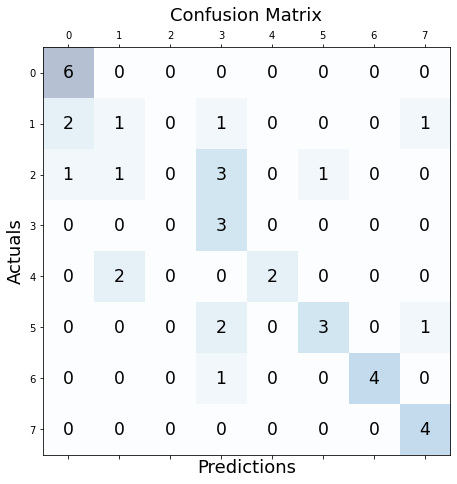

In [ ]:
# Matrix de confusão
conf_matrix = confusion_matrix(y_test, y_cv)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
acc = accuracy_score(y_test, y_cv)
print("\nAcurácia: %.2f" % acc)

pre = precision_score(y_test, y_cv, average = 'macro')
print("Precisão: %.2f" % pre)


Acurácia: 0.59
Precisão: 0.58


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Ao analisarmos este resultado de precisão e acurácia iguais à 59% é considerado aceitável, após o tratamento de dados e a criação de novas instâncias após o oversampling.

### 2º Questão:

Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:

A) Execute o K-means e Hierárquico.

B) Teste o K igual à 5 e 7.

C) Na execução do Hierárquico, varie 2 métodos do linkage; OBS.: utilize os mesmos valores de clusters escolhidos na questão anterior.

D) Por fim, faça uma comparação entre os 2 resultados das execuções anteriores e adote uma medida de avaliação própria para clusterização.

In [33]:
# Dropando a coluna com os valores a serem previstos
df_X = df_treated.drop('GRADE', axis = 1)

# Variável utilizada nas próximas células
pred_Kmeans = {}
pred_Hierarquico = {}

Silhouette Score de 4 Clusters: 0.12627895886515195 



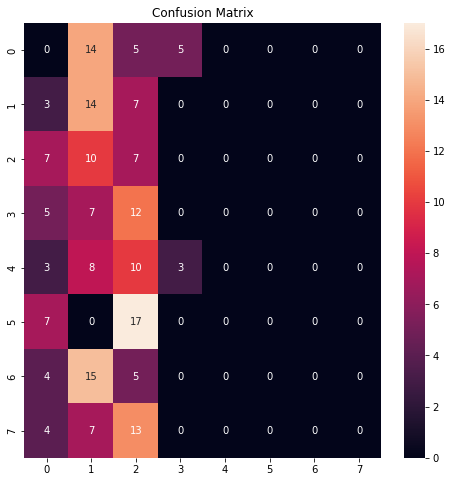

In [41]:
# Execução do Hierárquico com método complete e 4 clusters

cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
pred_h = cluster.fit_predict(df_X)
pred_Hierarquico["4 - complete"] = pred_h
score = silhouette_score(df_X, cluster.labels_, metric='euclidean')

print("Silhouette Score de 4 Clusters: {}\n".format(score))
ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_h),annot=(confusion_matrix(df_treated["GRADE"],pred_h)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Silhouette Score de 4 Clusters: 0.18902237816797307



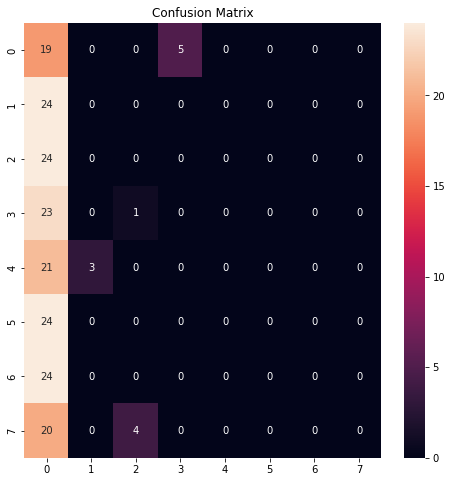

In [42]:
# Execução do Hierárquico com método average e 4 clusters

cluster = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
pred_h = cluster.fit_predict(df_X)
pred_Hierarquico["4 - average"] = pred_h
score = silhouette_score(df_X, cluster.labels_, metric='euclidean')

print("Silhouette Score de 4 Clusters: {}\n".format(score))
ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_h),annot=(confusion_matrix(df_treated["GRADE"],pred_h)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Silhouette Score de 5 Clusters: 0.15096287682485712



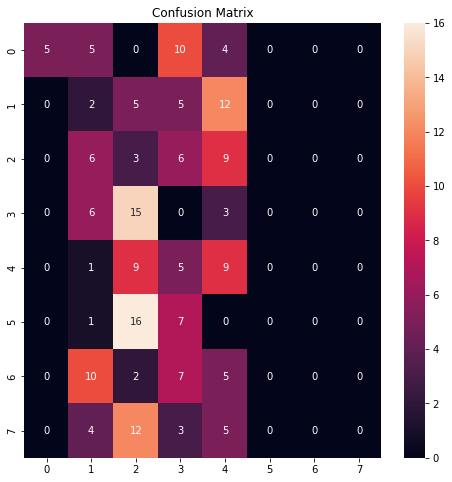

In [43]:
# Execução do K-means com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1)
pred_k = kmeans.fit_predict(df_X)
pred_Kmeans[5] = (pred_k)

score = silhouette_score(df_X, kmeans.labels_, metric='euclidean')
print("Silhouette Score de 5 Clusters: {}\n".format(score))
ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_k),annot=(confusion_matrix(df_treated["GRADE"],pred_k)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Silhouette Score de 5 Clusters: 0.10893224154007201



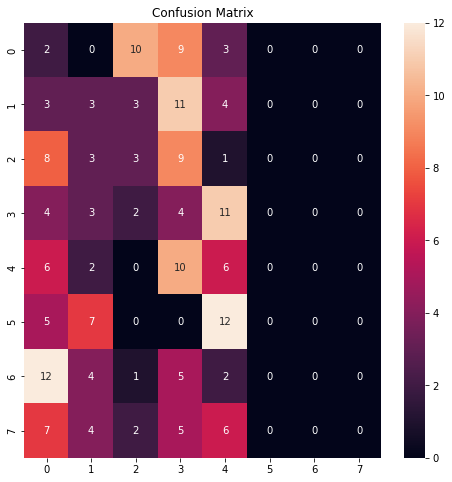

In [49]:
# Execução do K-means com 5 clusters e executado 5x com diferentes sementes de centroide

kmeans = KMeans(n_clusters=5, random_state=1, n_init = 5)
pred_k = kmeans.fit_predict(df_X)
pred_Kmeans[5] = (pred_k)
score = silhouette_score(df_X, kmeans.labels_, metric='euclidean')
print("Silhouette Score de 5 Clusters: {}\n".format(score))

ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_k),annot=(confusion_matrix(df_treated["GRADE"],pred_k)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Silhouette Score de 7 Clusters: 0.15290783156280877



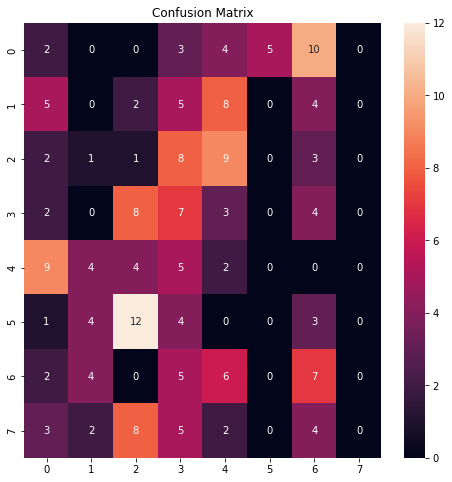

In [50]:
# Execução do K-means com 7 clusters 

kmeans = KMeans(n_clusters=7, random_state=1)
pred_k = kmeans.fit_predict(df_X)
pred_Kmeans[7] = (pred_k)
score = silhouette_score(df_X, kmeans.labels_, metric='euclidean')

print("Silhouette Score de 7 Clusters: {}\n".format(score))
ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_k),annot=(confusion_matrix(df_treated["GRADE"],pred_k)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Silhouette Score de 7 Clusters: 0.15290783156280877



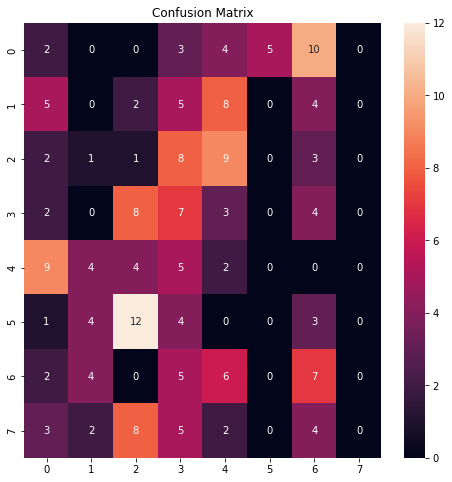

In [48]:
# Execução do K-means com 7 clusters e executado 7x com diferentes sementes de centroide

kmeans = KMeans(n_clusters=7, random_state=1, n_init = 7)
pred_k = kmeans.fit_predict(df_X)
pred_Kmeans[5] = (pred_k)
score = silhouette_score(df_X, kmeans.labels_, metric='euclidean')
print("Silhouette Score de 7 Clusters: {}\n".format(score))

ax = sns.heatmap(confusion_matrix(df_treated["GRADE"],pred_k),annot=(confusion_matrix(df_treated["GRADE"],pred_k)))
ax.figure.set_size_inches(8, 8)
ax.set_title("Confusion Matrix")
plt.show()

Analisando o Silhouette Score e as matrizes de confusão acima, obtemos o melhor resultado utilizando o Hierárquico com método average e 4 clusters com seu score de aproximadamente 0.189 que é considerado com a menor sobreposição de valores em comparação aos outros.

No Silhouette Score valores próximos de 0 indicam clusters sobrepostos. Valores negativos geralmente indicam que uma amostra foi atribuída ao cluster errado, pois um cluster diferente é mais semelhante e o melhor valor possível é 1.

### Questão bônus:

Diga vantagens e desvantagens do uso do AUTOML e como você faria para
usá-lo, garantindo os melhores resultados possíveis.

#### Vantagens:

* Coleta de dados éticos
* Mais fácil de sustentar
* Mais fácil de integrar na sociedade
* Avanço para Estatísticas
* Mais fácil de aumentar a força de trabalho/outra tecnologia com este

#### Desvantagens:

* Soluções de caixa preta
* Confiança excessiva na automação
* Desincentivando a explorar outras opções
* Pode causar divisões de opiniões em relação a comunidade ciêntifica.

Após a análise do algoritmo AutoML, se faz necessário estudar o motivo para a solução do método escolhido pelo ser o melhor possível, entender o algoritmo e como o mesmo trabalha é bastante proveitoso para um cientista de dados. Elimitar a solução de caixa preta e a confiança excessiva na automação trás uma melhor confiança para o cientista de dados e garante um resultado realmente confiável que é o melhor possível.